In [1]:
import os
import pickle
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(['science'])

In [2]:
import numpy as np
import sys
import torch
import hamiltorch
hamiltorch.set_random_seed(123) # making sure it's reproducible across repeats?
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sys.path.append('../diffusion-models-for-cosmological-fields/annotated/')
import evaluate
import utils
import hf_diffusion as hfd

/n/home02/nmudur/.conda/envs/rocky4_hmc/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
HMC_DIR = '../diffusion-models-for-cosmological-fields/annotated/results/hmc_samps/'

### Plot: RHat

In [5]:
dirname = '../diffusion-models-for-cosmological-fields/annotated/results/hmc_samps/exp1_rhat/0328_0037/'
psamps = np.load(os.path.join(dirname, 'samps.npy'))
config = pickle.load(open(os.path.join(dirname, 'config.pkl'), 'rb'))

In [6]:
dirname2 = '../diffusion-models-for-cosmological-fields/annotated/results/hmc_samps/exp1_rhat/0328_0007/'
psamps2 = np.load(os.path.join(dirname2, 'samps.npy'))
config2 = pickle.load(open(os.path.join(dirname2, 'config.pkl'), 'rb'))

In [7]:
config['params_init'], config2['params_init']

(array([0.11, 0.62], dtype=float32), array([0.3, 0.8], dtype=float32))

In [8]:
import matplotlib.pyplot as plt

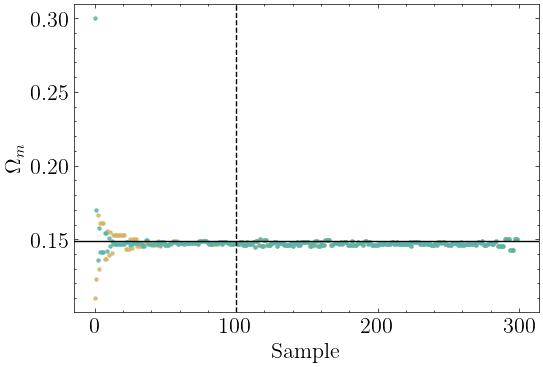

In [23]:
plt.figure(figsize=[6, 4])
plt.scatter(range(len(psamps2)), psamps[:, 0], color='#d8b365', s=5, alpha=0.8)
plt.scatter(range(len(psamps2)), psamps2[:, 0], color='#5ab4ac', s=5, alpha=0.8)
plt.axvline(100, color='k', linestyle='dashed')
plt.axhline(config['trueparam'][0, 0], color='k')
plt.xlabel('Sample')
plt.ylabel(r'$\Omega_m$')
plt.savefig('Figures/Final/HMC/rhat_omm.pdf')
plt.show()

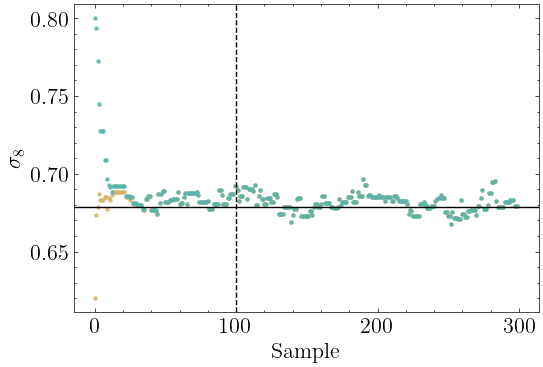

In [24]:
plt.figure(figsize=[6, 4])
plt.scatter(range(len(psamps2)), psamps[:, 1], color='#d8b365', s=5, alpha=0.8)
plt.scatter(range(len(psamps2)), psamps2[:, 1], color='#5ab4ac', s=5, alpha=0.8)
plt.axvline(100, color='k', linestyle='dashed')
plt.axhline(config['trueparam'][0, 1], color='k')
plt.xlabel('Sample')
plt.ylabel(r'$\sigma_8$')
plt.savefig('Figures/Final/HMC/rhat_sig8.pdf')
plt.show()

In [30]:
import hmc_analysis
import importlib
importlib.reload(hmc_analysis)

<module 'hmc_analysis' from '/n/holylfs06/LABS/finkbeiner_lab/Users/nmudur/project_dirs/CMD_2D/notebooks_main/../diffusion-models-for-cosmological-fields/annotated/hmc_analysis.py'>

In [31]:
BURNIN = 100
rhat = hmc_analysis.r_hat([psamps[BURNIN:], psamps2[BURNIN:]])

200 2 2


In [32]:
rhat

array([0.9974969 , 0.99749684], dtype=float32)

In [33]:
hmc_analysis.effective_sample_size(psamps[BURNIN:, 0]), hmc_analysis.effective_sample_size(psamps[BURNIN:, 1])

((131.43953986899322, 0.00011136251920243782),
 (16.237642093410983, 0.0013875689587840203))

In [51]:
delT = 2
ip = 0
np.corrcoef(psamps[BURNIN:, ip][:200-delT], psamps[BURNIN:, ip][delT:])

array([[ 1.        , -0.11097119],
       [-0.11097119,  1.        ]])

### Plot: Make 1D Marginal Plots

In [5]:
pars21 = evaluate.get_validation_cosmo_params(Bsize=10, seed=21, replace=False)

In [6]:
pars21

array([[0.2482 , 0.8034 , 1.96973, 0.42988, 0.64573, 0.59337],
       [0.1602 , 0.7174 , 3.56524, 0.855  , 0.90563, 0.51015],
       [0.3394 , 0.9626 , 0.75471, 0.93952, 1.21841, 1.68063],
       [0.167  , 0.9862 , 0.42514, 0.60963, 1.13682, 1.35754],
       [0.2558 , 0.7538 , 0.48431, 0.75471, 0.8162 , 0.57554],
       [0.303  , 0.8206 , 1.74836, 0.55478, 0.67971, 0.88332],
       [0.215  , 0.8858 , 1.68179, 3.06949, 1.58118, 1.9066 ],
       [0.1966 , 0.6186 , 0.47897, 0.47764, 1.99861, 1.11342],
       [0.101  , 0.6626 , 0.84323, 1.76786, 0.64662, 1.17365],
       [0.3794 , 0.8046 , 2.78562, 1.29594, 0.97739, 1.03311]],
      dtype=float32)

In [5]:
pars21 = evaluate.get_validation_cosmo_params(Bsize=10, seed=21, replace=False)

In [6]:
pars21

array([[0.2482 , 0.8034 , 1.96973, 0.42988, 0.64573, 0.59337],
       [0.1602 , 0.7174 , 3.56524, 0.855  , 0.90563, 0.51015],
       [0.3394 , 0.9626 , 0.75471, 0.93952, 1.21841, 1.68063],
       [0.167  , 0.9862 , 0.42514, 0.60963, 1.13682, 1.35754],
       [0.2558 , 0.7538 , 0.48431, 0.75471, 0.8162 , 0.57554],
       [0.303  , 0.8206 , 1.74836, 0.55478, 0.67971, 0.88332],
       [0.215  , 0.8858 , 1.68179, 3.06949, 1.58118, 1.9066 ],
       [0.1966 , 0.6186 , 0.47897, 0.47764, 1.99861, 1.11342],
       [0.101  , 0.6626 , 0.84323, 1.76786, 0.64662, 1.17365],
       [0.3794 , 0.8046 , 2.78562, 1.29594, 0.97739, 1.03311]],
      dtype=float32)

In [7]:
os.mkdir(HMC_DIR+'exp3_param1d')

In [10]:
os.listdir(HMC_DIR+'exp3_param1d')

['params_seed21.npy']

In [9]:
np.save(os.path.join(HMC_DIR, 'exp3_param1d', 'params_seed21.npy'), pars21)

In [6]:
pars2 = evaluate.get_validation_cosmo_params(Bsize=10, seed=2, replace=False)

In [7]:
pars2

array([[0.483  , 0.6218 , 1.06142, 0.83857, 0.91573, 0.60584],
       [0.2558 , 0.7538 , 0.48431, 0.75471, 0.8162 , 0.57554],
       [0.3682 , 0.6734 , 1.09429, 0.66619, 1.14949, 0.87965],
       [0.3614 , 0.6126 , 0.89131, 1.07326, 0.70662, 0.5445 ],
       [0.4638 , 0.9766 , 1.51782, 0.58156, 0.65022, 0.73357],
       [0.4642 , 0.6826 , 3.38229, 2.87189, 0.60836, 1.93858],
       [0.1294 , 0.885  , 1.15349, 0.76102, 1.5042 , 1.90132],
       [0.1602 , 0.7174 , 3.56524, 0.855  , 0.90563, 0.51015],
       [0.2662 , 0.9526 , 1.29235, 2.70195, 0.74898, 0.84499],
       [0.3522 , 0.6106 , 1.88426, 0.25596, 1.19831, 1.1042 ]],
      dtype=float32)

In [8]:
pars2[5:6, :]

array([[0.4642 , 0.6826 , 3.38229, 2.87189, 0.60836, 1.93858]],
      dtype=float32)

In [9]:
np.save(os.path.join(HMC_DIR, 'exp3_param1d', 'params_seed2.npy'), pars2[5:6, :])

#### Plts

In [5]:
EXP_DIR = os.path.join(HMC_DIR, 'exp3_param1d')

In [6]:
om_gt, om_pred, om_pcts = [], [], []
sig8_gt, sig8_pred, sig8_pcts = [], [], []

In [7]:
BURN = 100

In [8]:
pdirs = []
for i in range(10):
    pdirs.append(os.path.join(EXP_DIR, f'param_{i}/'))

In [9]:
pdirs[8] = '../diffusion-models-for-cosmological-fields/annotated/results/hmc_samps/exp3_param1d/param_set2_0/'

In [10]:
len(pdirs)

10

In [11]:
for pdir in pdirs:
    if os.path.exists(pdir):
        config = pickle.load(open(pdir+'config.pkl', 'rb'))
        psamps = np.load(pdir+'samps.npy')
        psubset = psamps[BURN:]
        
        om_gt.append(config['trueparam'][0, 0])
        sig8_gt.append(config['trueparam'][0, 1])
        om_pred.append(psubset[:, 0].mean())
        sig8_pred.append(psubset[:, 1].mean())
        
        om_pcts.append([np.percentile(psubset[:, 0], 15.87), np.percentile(psubset[:, 0], 84.13)])
        sig8_pcts.append([np.percentile(psubset[:, 1], 15.87), np.percentile(psubset[:, 1], 84.13)])

In [12]:
om_pcts = np.vstack(om_pcts)
sig8_pcts = np.vstack(sig8_pcts)

In [13]:
om_pred = np.array(om_pred)
sig8_pred = np.array(sig8_pred)

In [14]:
fcol = '#085c64'

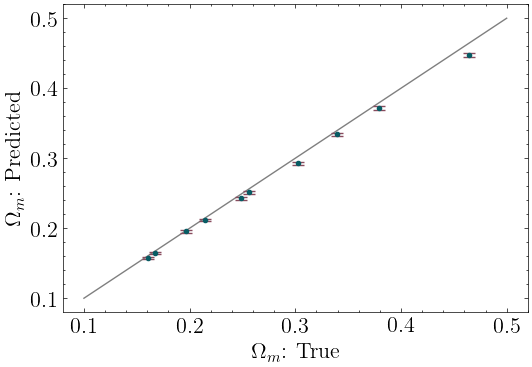

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0.1, 0.5, 50), np.linspace(0.1, 0.5, 50), c='k', alpha=0.5)
plt.errorbar(om_gt, om_pred, (om_pred - om_pcts[:, 0], om_pcts[:, 1]- om_pred), fmt='o', markerfacecolor=fcol, markeredgecolor=fcol, color='#884c5e', markersize=3, elinewidth=1, solid_capstyle='projecting', capsize=4)
plt.xlabel(r'$\Omega_m$: True')
plt.ylabel(r'$\Omega_m$: Predicted')
plt.savefig('Figures/Final/HMC/om1d_t20.pdf', bbox_inches='tight')
plt.show()

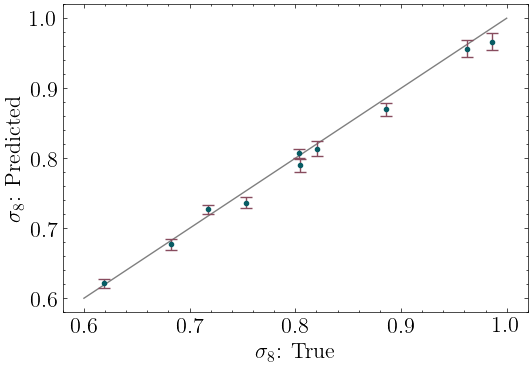

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0.6, 1.0, 50), np.linspace(0.6, 1.0, 50), c='k', alpha=0.5)
plt.errorbar(sig8_gt, sig8_pred, (sig8_pred - sig8_pcts[:, 0], sig8_pcts[:, 1]- sig8_pred), fmt='o', markerfacecolor=fcol, markeredgecolor=fcol, color='#884c5e', markersize=3, elinewidth=1, solid_capstyle='projecting', capsize=4)
plt.xlabel(r'$\sigma_8$: True')
plt.ylabel(r'$\sigma_8$: Predicted')
plt.savefig('Figures/Final/HMC/sig81d_t20.pdf', bbox_inches='tight')
plt.show()

Abs Bias

In [18]:
np.mean(om_pred - om_gt), np.mean(np.abs(om_pred - om_gt))

(-0.00602708, 0.00602708)

In [19]:
np.mean(sig8_pred - sig8_gt), np.mean(np.abs(sig8_pred - sig8_gt))

(-0.0070615234, 0.010330456)

Percentage biases

In [20]:
100*np.mean(np.abs(((om_pred - om_gt)/om_gt)))

1.9936908036470413

In [21]:
100*np.mean(np.abs(((sig8_pred - sig8_gt)/sig8_gt)))

1.258228998631239

Z Score

In [22]:
om_pcts.shape

(10, 2)

In [23]:
om_sig = (om_pcts[:, 1] - om_pcts[:, 0])/2
sig8_sig = (sig8_pcts[:, 1] - sig8_pcts[:, 0])/2

In [24]:
om_sig, sig8_sig

(array([0.00183682, 0.00138056, 0.00262127, 0.00133009, 0.00193039,
        0.00221148, 0.00153125, 0.00148689, 0.00287051, 0.0028192 ]),
 array([0.00646132, 0.00584185, 0.01249648, 0.01247743, 0.0082464 ,
        0.01105079, 0.00955604, 0.00654557, 0.00812426, 0.00942418]))

In [25]:
(om_pred - om_gt)/om_sig, (sig8_pred -sig8_gt)/sig8_sig

(array([-2.95654592, -2.07787449, -1.98235137, -1.44179429, -2.21626354,
        -4.56224796, -2.45169723, -0.85800563, -5.99833374, -2.92345911]),
 array([ 0.57372951,  1.68423699, -0.49971832, -1.60632283, -2.14729697,
        -0.63771866, -1.62556717,  0.42754964, -0.67033253, -1.58503967]))

In [26]:
np.mean(np.abs((om_pred - om_gt)/om_sig)), np.mean(np.abs((sig8_pred -sig8_gt)/sig8_sig))

(2.7468573283754534, 1.1457512294121392)

### Plot: Comparison with Pk

In [5]:
EXP_DIR = os.path.join(HMC_DIR, 'exp3_param1d')

In [6]:
from lampe.plots import nice_rc, corner, mark_point
from lampe.inference import NPE, NPELoss

In [7]:
i=0
pdir = os.path.join(EXP_DIR, f'param_{i}/')
config = pickle.load(open(pdir+'config.pkl', 'rb'))
psamps = np.load(pdir+'samps.npy')

In [8]:
config['trueparam']

array([[0.2482 , 0.8034 , 1.96973, 0.42988, 0.64573, 0.59337]],
      dtype=float32)

In [9]:
config.keys()

dict_keys(['MODEL', 'CKPNUM', 'sdpath', 'Tsub', 'trueparam', 'pseed', 'truefields', 'params_init', 'params_hmc', 'sampler', 'num_time_batches', 'field', 'step_size', 'num_steps_per_sample', 'num_samples', 'inv_mass', 'accumulated_gradient', 'store_on_GPU'])

In [10]:
truefields = config['truefields']

In [11]:
truefields.shape

(1, 256, 256)

In [12]:
# get the same field and check that the transformation is the same.
MODEL = 'Run_10-30_2-32'
CKPNUM = '260000'
sdpath = f'../diffusion-models-for-cosmological-fields/annotated/results/samples_exps/{MODEL}/checkpoint_{CKPNUM}.pt'
dirname = sdpath[:sdpath.rindex('/')+1]
print(dirname, type(dirname))
tr, invtr = evaluate.retrieve_data_transforms(dirname)
ttfield = tr(torch.tensor(truefields).unsqueeze(0).to(device))

../diffusion-models-for-cosmological-fields/annotated/results/samples_exps/Run_10-30_2-32/ <class 'str'>
Getting transforms from  ../diffusion-models-for-cosmological-fields/annotated/results/samples_exps/Run_10-30_2-32/e1_nx256_newlinearsmall.yaml
minmax+randfliprot
RandomFlipRot followed by Minmax scaling to -1, 1
RangeMin=9.421, RangeMax=15.445


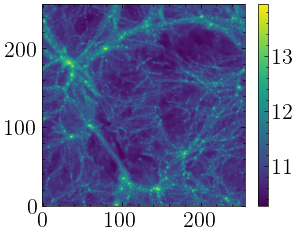

In [13]:
plt.figure()
c = plt.imshow(truefields[0], origin='lower')
plt.colorbar(c)
plt.show()

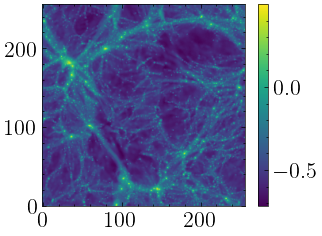

In [14]:
plt.figure()
c = plt.imshow(ttfield[0, 0], origin='lower')
plt.colorbar(c)
plt.show()

In [15]:
ttfield[0, 0, 0, 0], ttfield[0, 0, 0, 1] # same as in the file

(tensor(-0.4684), tensor(-0.4912))

In [16]:
ttfield = invtr(ttfield)

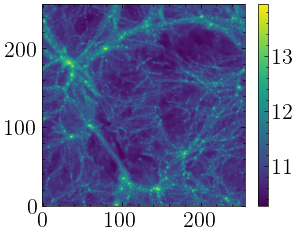

In [17]:
plt.figure()
c = plt.imshow(ttfield[0, 0], origin='lower')
plt.colorbar(c)
plt.show()

In [18]:
BURN=100
psubset = psamps[BURN:]

In [19]:
x = ttfield[0]

In [20]:
kvals, pk = evaluate.get_powspec_for_samples([10**x.numpy()], normalize=True)
statistic = np.log10(pk[0])
mean_fields = x.mean(axis=[1, 2])

In [21]:
statistic = np.hstack([mean_fields.reshape((-1, 1)), statistic])

In [22]:
statistic.shape

(1, 129)

In [23]:
estimator = NPE(2, 129, transforms=3, hidden_features=[64] * 3)
estimator.load_state_dict(torch.load('../notebooks/Tmp/NPML/npe_choice3b_logpk_linfield.pt'))
estimator.eval()

NPE(
  (flow): MAF(
    (transform): LazyComposedTransform(
      (0): MaskedAutoregressiveTransform(
        (base): MonotonicAffineTransform()
        (order): [0, 1]
        (hyper): MaskedMLP(
          (0): MaskedLinear(in_features=131, out_features=64, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=64, out_features=64, bias=True)
          (3): ReLU()
          (4): MaskedLinear(in_features=64, out_features=64, bias=True)
          (5): ReLU()
          (6): MaskedLinear(in_features=64, out_features=4, bias=True)
        )
      )
      (1): MaskedAutoregressiveTransform(
        (base): MonotonicAffineTransform()
        (order): [1, 0]
        (hyper): MaskedMLP(
          (0): MaskedLinear(in_features=131, out_features=64, bias=True)
          (1): ReLU()
          (2): MaskedLinear(in_features=64, out_features=64, bias=True)
          (3): ReLU()
          (4): MaskedLinear(in_features=64, out_features=64, bias=True)
          (5): ReLU()
          (

In [24]:
with torch.no_grad():
    pk_samples = estimator.flow(torch.tensor(statistic[0])).sample((10000,)) # changed 600 to 10k??

In [25]:
pk_samples.shape

torch.Size([10000, 2])

In [26]:
pk_samples

tensor([[0.4655, 0.6497],
        [0.2719, 0.7918],
        [0.2257, 0.9235],
        ...,
        [0.2529, 0.9420],
        [0.2157, 0.8484],
        [0.3348, 0.7052]])

In [27]:
from astropy.convolution import Gaussian2DKernel, convolve

In [28]:
from lampe.plots import LinearAlphaColormap

In [29]:
import hmc_analysis

In [30]:
from matplotlib.patches import Ellipse

/tmp/ipykernel_2025932/3068264877.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = Ellipse((np.mean(psubset[:, 0]), np.mean(psubset[:, 1])), width=w, height=h, angle=r, edgecolor=scomb[1], fill=True, color='#884c5e', alpha=0.3)
/tmp/ipykernel_2025932/3068264877.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Figures/Final/HMC/pk-mean_comparison_inset.pdf') #equal_sm


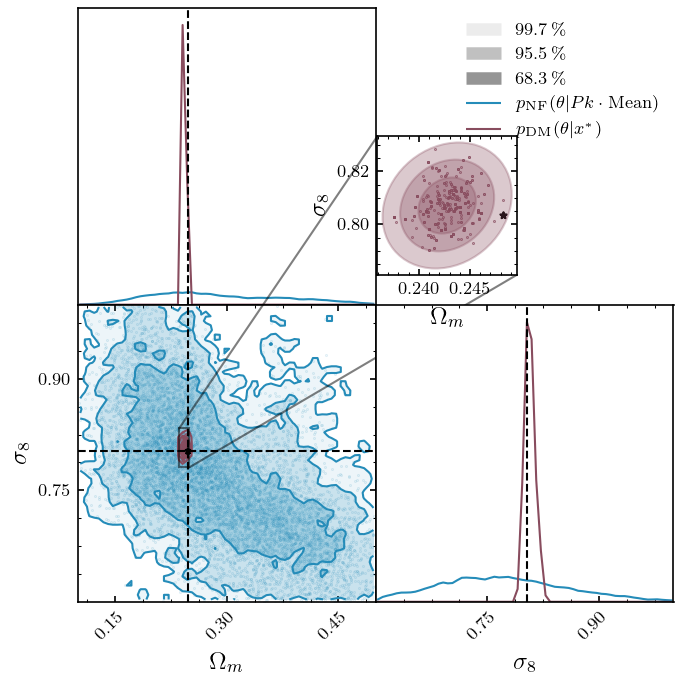

In [35]:
plt.rcParams.update(nice_rc(latex=True))  # nicer plot settings
labels=[r'$\Omega_m$', r'$\sigma_8$']

fig = corner(
    pk_samples,
    smooth=0.8,
    domain=([0.1, 0.6], [0.5, 1.0]),
    labels=labels,
    legend=r'$p_{\rm{NF}}(\theta | Pk  \cdot \rm{Mean})$',
    figsize=(4.8, 4.8),
    color='#258cb9', )

fig = corner(
    psubset,
    smooth=0.2,
    domain=([0.1, 0.6], [0.5, 1.0]),
    labels=labels,
    legend=r'$p_{\rm{DM}}(\theta | x^*)$',
    figsize=(4.8, 4.8),
    color='#884c5e',
    figure=fig
)

mark_point(fig, config['trueparam'][0, :2], marker='*')

ax_list = fig.axes

ax_list[2].scatter(pk_samples[:, 0], pk_samples[:, 1], color='#258cb9', alpha=0.2, s=0.1)
ax_list[2].scatter(psubset[:, 0], psubset[:, 1], color='#884c5e', alpha=0.5, s=0.2)
inset_width = ax_list[2].get_position().width / 2
inset_height = ax_list[2].get_position().height / 2
inset_left = ax_list[2].get_position().x0 + 1.1*ax_list[2].get_position().width
inset_bottom = ax_list[2].get_position().y0 + 1.25*ax_list[2].get_position().height
axins = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])
NB=5
H, xedges, yedges = np.histogram2d(psubset[:, 0], psubset[:, 1], bins=(NB,NB), density=True)
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])
kernel = Gaussian2DKernel(0.8)
H=convolve(H,kernel)

axins.scatter(psubset[:, 0], psubset[:, 1], s=0.1, color='#884c5e')
axins.scatter(config['trueparam'][0, 0], config['trueparam'][0, 1], s=10, marker='*', color='k')
axins.set_xlabel(labels[0])
axins.set_ylabel(labels[1])

sigcolors=[[0.683, '#884c5e'], [0.954, '#884c5e'], [0.997, '#884c5e']]
covar=np.cov(psubset.T)
for scomb in sigcolors:
    w, h, r=hmc_analysis.cov_ellipse(covar, scomb[0])
    ellipse = Ellipse((np.mean(psubset[:, 0]), np.mean(psubset[:, 1])), width=w, height=h, angle=r, edgecolor=scomb[1], fill=True, color='#884c5e', alpha=0.3)
    axins.add_patch(ellipse)

ax_list[2].indicate_inset_zoom(axins, edgecolor="black", zorder=20)


plt.savefig('Figures/Final/HMC/pk-mean_comparison_inset.pdf') #equal_sm

### Plot: Combined Effect with HMC

In [5]:
dirname = '../diffusion-models-for-cosmological-fields/annotated/results/hmc_samps/exp2_Ntime/'

In [6]:
os.listdir(dirname)

['0328_0007', '0328_0109', '0328_2343', '0329_1535', '0329_0025', '0328_0206']

In [12]:
config = pickle.load(open(os.path.join(dirname, '0328_0007', 'config.pkl'), 'rb'))
config['Tsub']

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [13]:
T_filemap = {'1': '0328_0206','5': '0328_2343', '10': '0328_0109', '20': '0328_0007', '40': '0329_0025', '1000': '0329_1535'}

In [14]:
BURN = 100

In [24]:
tnums = list(T_filemap.keys())

In [25]:
preds = {}
omm_pred = []
omm_16 = []
omm_84 = []
sig8_pred = []
sig8_16 = []
sig8_84 = []

for tsub in tnums:
    fdir = T_filemap[tsub]
    config = pickle.load(open(os.path.join(dirname, fdir, 'config.pkl'), 'rb'))
    psamps =  np.load(os.path.join(dirname, fdir, 'samps.npy'))
    assert int(tsub)==len(config['Tsub']), print(tsub, len(config['Tsub']))
    print(config['trueparam'], config['params_init'])
    pmain = psamps[BURN:, :]
    omm_pred.append(np.mean(pmain[:, 0]))
    omm_16.append(np.percentile(pmain[:, 0], 15.9))
    omm_84.append(np.percentile(pmain[:,0], 84.1))
    sig8_pred.append(np.mean(pmain[:, 1]))
    sig8_16.append(np.percentile(pmain[:, 1], 15.9))
    sig8_84.append(np.percentile(pmain[:,1], 84.1))

[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]
[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]
[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]
[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]
[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]
[[0.149   0.6786  1.58227 2.19466 0.5852  1.3632 ]] [0.3 0.8]


In [26]:
omm_pred = np.array(omm_pred)
omm_16 = np.array(omm_16)
omm_84 = np.array(omm_84)
sig8_pred = np.array(sig8_pred)
sig8_16 = np.array(sig8_16)
sig8_84 = np.array(sig8_84)

In [27]:
omm_1sig = np.stack([omm_pred - omm_16, omm_84 - omm_pred])
sig8_1sig = np.stack([sig8_pred - sig8_16, sig8_84 - sig8_pred])

In [28]:
omm_pred.shape, len(tnums)

((6,), 6)

In [33]:
fcol = '#085c64'

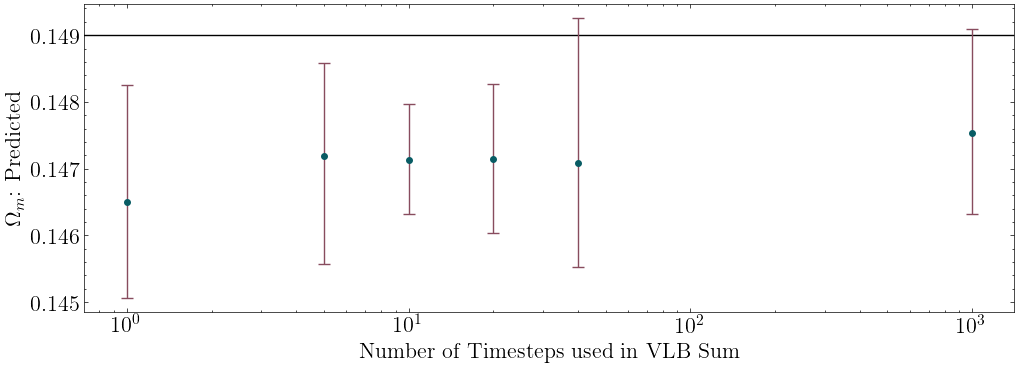

In [34]:
plt.figure(figsize=(12, 4))
plt.axhline(config['trueparam'][0, 0], c='k')
plt.errorbar(list(map(int, tnums)), omm_pred, omm_1sig, fmt='o', markerfacecolor=fcol, markeredgecolor=fcol, color='#884c5e', markersize=4, elinewidth=1, solid_capstyle='projecting', capsize=4)
plt.xlabel(r'Number of Timesteps used in VLB Sum')
plt.ylabel(r'$\Omega_m$: Predicted')
plt.xscale('log')
plt.savefig('Figures/Final/HMC/conv_omm.pdf', bbox_inches='tight')
plt.show()

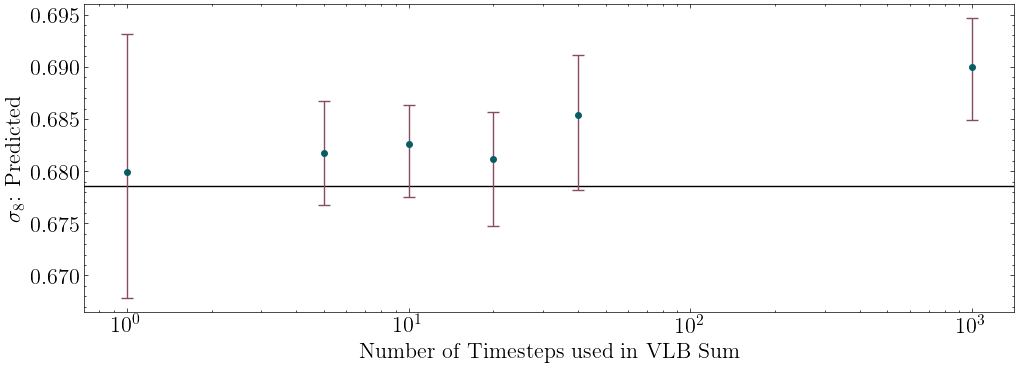

In [35]:
plt.figure(figsize=(12, 4))
plt.axhline(config['trueparam'][0, 1], c='k')
plt.errorbar(list(map(int, tnums)), sig8_pred, sig8_1sig, fmt='o', markerfacecolor=fcol, markeredgecolor=fcol, color='#884c5e', markersize=4, elinewidth=1, solid_capstyle='projecting', capsize=4)
plt.xlabel(r'Number of Timesteps used in VLB Sum')
plt.ylabel(r'$\sigma_8$: Predicted')
plt.xscale('log')
plt.savefig('Figures/Final/HMC/conv_sig8.pdf', bbox_inches='tight')
plt.show()

In [37]:
tnums

['1', '5', '10', '20', '40', '1000']

In [40]:
100*(omm_pred[3] - omm_pred[-1])/omm_pred[-1], 100*(sig8_pred[3] - sig8_pred[-1])/sig8_pred[-1]

(-0.2596958714093349, -1.2719231218782991)

### Plot: Grid+Single timestep time addition

In [8]:
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

In [9]:
likfile = '../diffusion-models-for-cosmological-fields/annotated/CondLik/Run_10-30_2-32/validation/checkpoint_260000/0220_1641/p_0_tseed_2_vlbseed_9.pkl'

In [10]:
cdict = pickle.load(open(os.path.join(likfile), 'rb'))

In [11]:
cdict.keys()

dict_keys(['ptruth', 'peval', 'condlikvals', 'vlb_timesteps', 'transform_seed', 'vlb_seed'])

#### Individual effect

In [9]:
cdict['condlikvals'].shape

(2500, 1, 1, 1001)

In [10]:
NDISC = 50

In [11]:
sample=0
VLB_TIMESTEPS = [0, 2, 5, 8, 10, 15, 20, 30, 40, 50, 100, 200, 500, 999]

In [12]:
ptruth = cdict['ptruth']
peval = cdict['peval']
condlikvals = cdict['condlikvals']
delnll = 2*(condlikvals - np.min(condlikvals, axis=0, keepdims=True))
# axis=0 ensures that you're NOT mixing the minimums ACROSS different timesteps (keeping it individual).
# keepdims helps subtract the correct timestep for the entire array.

In [13]:
cdict['peval'][:, 1].max() - cdict['ptruth'][:, 1]

array([0.06], dtype=float32)

In [14]:
len(np.min(condlikvals, axis=0, keepdims=True).flatten()), len(np.unique(np.min(condlikvals, axis=0, keepdims=True).flatten()))

(1001, 1001)

In [15]:
condlikvals.shape #N_Eval, N_sample?, 0, T

(2500, 1, 1, 1001)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
14 14 13


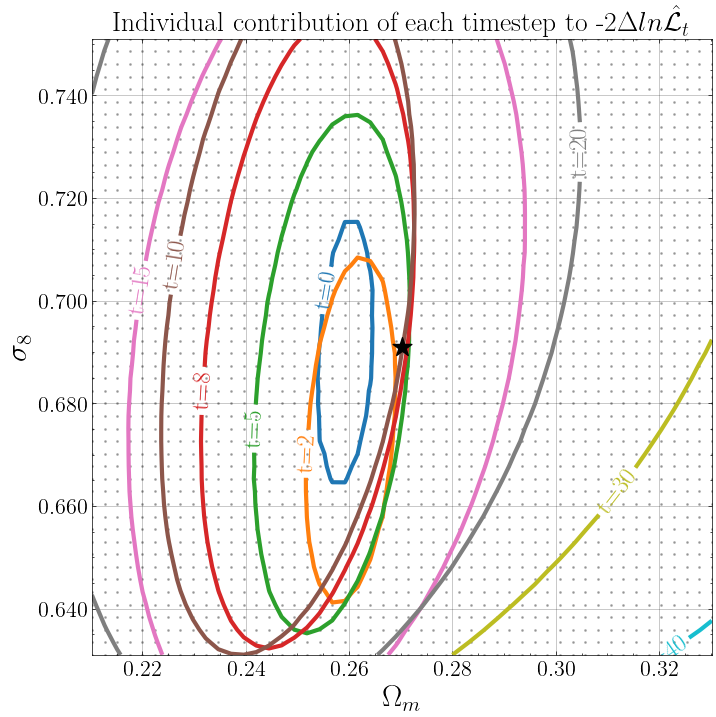

In [17]:
colpts = np.linspace(0, 1.0, 9)
print(colpts)
cmap = mpl.colormaps['tab10']
cycle = [cmap(c) for c in  colpts]
cycle+=['grey']*(len(VLB_TIMESTEPS) - len(cycle))

NDISC = 50
fig, ax = plt.subplots(figsize=(8, 8))
posns = [(-1.6, 1), (-0.5, 0.7), (-10, 0.99), (-8, 1.2), (-4, 1.4), (-4, 1.4), (10, 0.75), (0.2, 0.75), (0.2, 0.75), (-10, 0.99), (-8, 1.2), (-1.6, 1),  (0.2, 0.7)]

print(len(VLB_TIMESTEPS), len(cycle), len(posns))
for idxt, t_single in enumerate(VLB_TIMESTEPS):
    c = ax.contour(peval[:, 0].reshape((NDISC, NDISC)), peval[:, 1].reshape((NDISC, NDISC)), delnll[:, 0, sample, t_single].reshape((NDISC, NDISC)),
                [2.30], colors=[cycle[idxt]], linewidths=[3])
    fmt = {2.3: 't='+str(t_single)}
    if t_single<50:
        ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=18, manual= [posns[idxt]], rightside_up=True)
ax.scatter(ptruth[0, 0], ptruth[0, 1], s=200, marker='*', c='k', zorder=30)
ax.scatter(peval[:, 0], peval[:, 1], s=1, c='grey', alpha=0.6)                   
plt.xlabel('$\Omega_m$', fontsize=22)
plt.ylabel('$\sigma_8$', fontsize=22)
plt.title(r'Individual contribution of each timestep to -2$\Delta ln \hat{\mathcal{L}_t}$', fontsize=20)
plt.locator_params(axis='x', nbins=7)
plt.locator_params(axis='y', nbins=8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.grid(c='k', ls='-', alpha=0.3)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('Figures/Final/Grid/clik_t.pdf', bbox_inches='tight')
plt.show()